In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Loading data

In [ ]:
df = pd.read_csv("/content/breast-cancer.csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


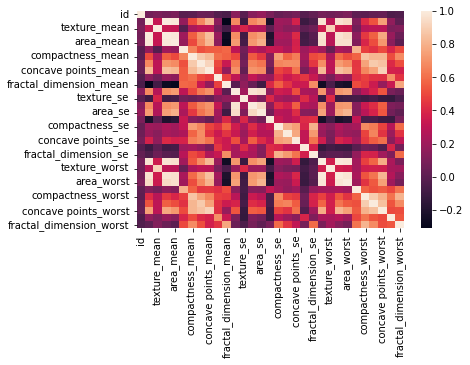

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df["diagnosis"] = np.where(df["diagnosis"] == "M", 1, 0)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Plot

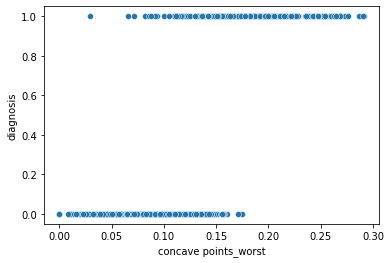

In [ ]:
sns.scatterplot(data=df, x="concave points_worst", y="diagnosis")

# Separing data

In [ ]:
X = df[["concave points_worst", "perimeter_worst"]]
y = df["diagnosis"]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

# Implementing logistic regression

In [ ]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(np.dot(x, w) + b)))

In [ ]:
def cost_function_derivative(x, y, w, b, pos):
  x, y, w = np.array(x), np.array(y), np.array(w)
  sum = 0
  m = len(x)
  for i in range(m):
    prediction = sigmoid(x[i], w, b)
    real = y[i]
    sum +=  (prediction - real)*(x[i][pos])

  return sum/m

In [ ]:
def cost_function_derivative_b(x, y, w, b):
  x, y, w = np.array(x), np.array(y), np.array(w)
  sum = 0
  m = len(x)
  for i in range(m):
    prediction = sigmoid(x[i], w, b)
    real = y[i]
    sum +=  (prediction - real)

  return sum/m

In [ ]:
def gradient_descent(x, y, learning_rate=0.1, n_iterations=10000):
  m = x.shape[0]
  n = 1 if isinstance(x, pd.Series) else len(x.columns)
  w = np.zeros((n,))
  b = 0.
  w_s = {}
  for _ in range(n_iterations):
    for i in range(n):
      w_s[i] = w[i] - (learning_rate * (cost_function_derivative(x, y, w, b, i)))
    b = b - (learning_rate * (cost_function_derivative_b(x, y, w, b)))

    w = list(w_s.values())

  return w, b

In [ ]:
w, b = gradient_descent(X_train, y_train)
w, b

([9.931030063227443, 9.686938776997286], -7.4760897538567495)

In [ ]:
my_log_reg_pred = []
for i in range(X_test.shape[0]):
  prediction = sigmoid(np.array(X_test)[i], [9.931030063, 9.6883877], -7.476098)
  if prediction > 0.5:
    my_log_reg_pred.append(1)
  else:
    my_log_reg_pred.append(0)

# Using sklearn

In [ ]:
log_reg = LogisticRegression().fit(X_train, y_train)
sk_log_reg_pred = log_reg.predict(X_test)

In [ ]:
log_reg.coef_, log_reg.intercept_

(array([[6.50702275, 5.78283066]]), array([-4.92572796]))

In [ ]:
sigmoid(np.array(X_test)[4], [9.931030063, 9.6883877], -7.476098)

0.9004322908199369

In [ ]:
1/(1 + np.exp(-(np.dot(np.array(X_test)[4], [6.50702275, 5.78283066]) - 4.92572796)))

0.7567037143594988

# Comparing results

In [ ]:
tests = pd.DataFrame({'diagnosis': y_test, 'sk_logreg': sk_log_reg_pred, 'my_logreg': my_log_reg_pred})

In [ ]:
tests.head()

,diagnosis,sk_logreg,my_logreg
266,0,0,0
448,0,0,0
420,0,0,0
493,0,0,0
321,1,1,1


In [ ]:
tests[tests["sk_logreg"] != tests["my_logreg"]]

,diagnosis,sk_logreg,my_logreg
73,1,0,1


In [ ]:
accuracy_score(y_test, my_log_reg_pred)

0.9473684210526315

In [ ]:
accuracy_score(y_test, sk_log_reg_pred)

0.9298245614035088